In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Q1 Load the following image and detect as much as you can all faces


In [2]:
faceClassifier=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
eyeClassifier=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')


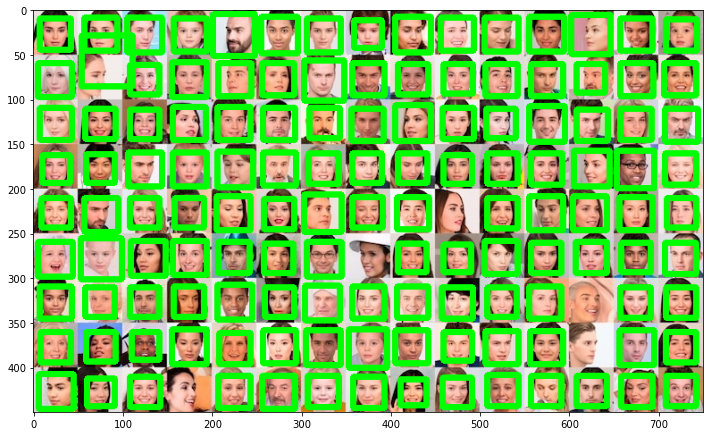

In [3]:
img=cv2.imread("faces.jpg")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(12,12))
#plt.imshow(gray,cmap='gray')
faces=faceClassifier.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=2,minSize=(3,3))

#print(faces)
#print(faces.shape)
for x,y,w,h in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),5)
    face=gray[y:y+h,x:x+w]
    
plt.imshow(img[:,:,::-1])
#plt.imshow(face,cmap='gray')




# Q2 Load the following image and detect faces,eye,smile and write under every detection label “Peter” ,”eye” ,”smile” as arranged.


In [4]:
faceClassifier=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
eyeClassifier=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')
smileClassifier=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_smile.xml')

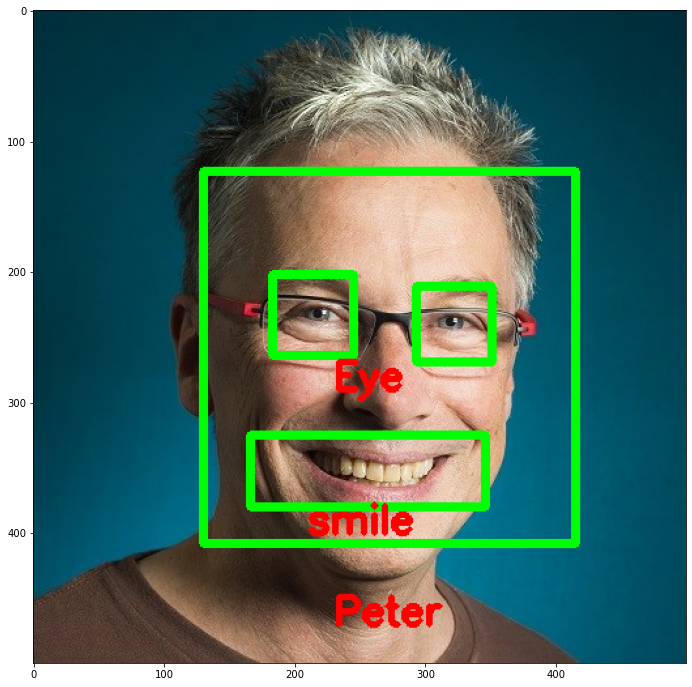

In [35]:
img=cv2.imread("d42473-018-00009-z_15736222.jpg")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(12,12))
#plt.imshow(gray,cmap='gray')
faces=faceClassifier.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=2,minSize=(150,150))

#print(faces)
#print(faces.shape)
for x,y,w,h in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),5)
    face=gray[y:y+h,x:x+w]
    eyes=eyeClassifier.detectMultiScale(face,scaleFactor=1.01,minNeighbors=6,minSize=(50,50))    
    for x2,y2,w2,h2 in eyes:
        cv2.rectangle(img,(x+x2,y+y2),(x+x2+w2,y+y2+h2),(0,255,0),5)
    smile=smileClassifier.detectMultiScale(face,scaleFactor=1.01,minNeighbors=6,minSize=(100,100))
    for x3,y3,w3,h3 in smile:
        cv2.rectangle(img,(x+x3+15,y+y3+30),(x+x3+w3-15,y+y3+h3-20),(0,255,0),5)


        #print(eyes)

#print(eyes)
    
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img, 'Peter', (230,470), font, 1, (0, 0, 255), 3, cv2.FILLED)
cv2.putText(img, 'Eye', (230,290), font, 1, (0, 0, 255), 3, cv2.FILLED)
cv2.putText(img, 'smile', (210,400), font, 1, (0, 0, 255), 3, cv2.FILLED)

plt.imshow(img[:,:,::-1])
#plt.imshow(face,cmap='gray')




# Q3Run your camera stream and make detection for faces,eye,smile and write under every detection label “me” ,”eye” ,”smile” as arranged. Make circle for eye and others rectangle

In [40]:
cap=cv2.VideoCapture(0)
faceClassifier=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
font = cv2.FONT_HERSHEY_SIMPLEX

while (cap.isOpened()):

    ret,frame=cap.read()

    if (ret):
        gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        faces=faceClassifier.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=2,minSize=(70,70))
        for x,y,w,h in faces:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),5)
            cv2.putText(frame, 'Amgad', (230,470), font, 1, (0, 0, 255), 3, cv2.FILLED)
            face=gray[y:y+h,x:x+w]
            eyes=eyeClassifier.detectMultiScale(face,scaleFactor=1.01,minNeighbors=6,minSize=(50,50))    
            for x2,y2,w2,h2 in eyes:
                #cv2.rectangle(frame,(x+x2,y+y2),(x+x2+w2,y+y2+h2),(0,255,0),5)
                cv2.circle(frame,(x+x2+w2//2,y+y2+h2//2),25,(0,255,0),4)

                cv2.putText(frame, 'Eye', (230,290), font, 1, (0, 0, 255), 3, cv2.FILLED)
            smile=smileClassifier.detectMultiScale(face,scaleFactor=1.01,minNeighbors=6,minSize=(98,98))
            for x3,y3,w3,h3 in smile:
                cv2.rectangle(frame,(x+x3,y+y3),(x+x3+w3,y+y3+h3),(0,255,0),5)
                cv2.putText(frame, 'smile', (210,400), font, 1, (0, 0, 255), 3, cv2.FILLED)

    cv2.imshow("my_image",frame)
    k=cv2.waitKey(1)
    if k==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()